In [1]:
import pickle
import pandas as pd
import numpy as np
import detectda as dtda
import matplotlib.pyplot as plt
from skimage import filters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
from joblib import Parallel, delayed
from scipy.stats import mode

In [2]:
names_exp4_df = ['cp_bcc', 'bcc_beta1', 'bcc_beta2', 'bcc_beta3', 'bcc_beta4', 'bcc_beta5',
                'rmse_bcc', 'cp_cf', 'pval_cf', 'cp_kcp', 'cp_kcp_std', 'cp_ecp', 'cp_ecp_std', 'cp_mean']
exp4_df = pd.read_table('experiment4_data.txt', sep=',', header=None, names=names_exp4_df)

In [11]:
print('P. Exact BCLR: %0.3f' % np.mean(exp4_df['cp_bcc']==350))

print('P. Exact CF: %0.3f' % np.mean(exp4_df['cp_cf']==350))

print('P. Exact KCP: %0.3f' % np.mean(exp4_df['cp_kcp']==350))

print('P. Exact KCP STD: %0.3f' % np.mean(exp4_df['cp_kcp_std']==350))

print('P. Exact ECP: %0.3f' % np.mean(exp4_df['cp_ecp']==350))

print('P. Exact ECP STD: %0.3f' % np.mean(exp4_df['cp_ecp_std']==350))

print('P. Exact MEAN: %0.3f' % np.mean(exp4_df['cp_mean']==350))

P. Exact BCLR: 0.275
P. Exact CF: 0.205
P. Exact KCP: 0.122
P. Exact KCP STD: 0.269
P. Exact ECP: 0.004
P. Exact ECP STD: 0.271
P. Exact MEAN: 0.024


In [17]:
print('P. Exact BCLR: %0.3f' % (np.std(exp4_df['cp_bcc']==350)/50))

print('P. Exact CF: %0.3f' % (np.std(exp4_df['cp_cf']==350)/50))

print('P. Exact KCP: %0.3f' % (np.std(exp4_df['cp_kcp']==350)/50))

print('P. Exact KCP STD: %0.3f' % (np.std(exp4_df['cp_kcp_std']==350)/50))

print('P. Exact ECP: %0.3f' % (np.std(exp4_df['cp_ecp']==350)/50))

print('P. Exact ECP STD: %0.3f' % (np.std(exp4_df['cp_ecp_std']==350)/50))

print('P. Exact MEAN: %0.3f' % (np.std(exp4_df['cp_mean']==350)/50))

P. Exact BCLR: 0.009
P. Exact CF: 0.008
P. Exact KCP: 0.007
P. Exact KCP STD: 0.009
P. Exact ECP: 0.001
P. Exact ECP STD: 0.009
P. Exact MEAN: 0.003


In [13]:
print('RMSE BCLR: %0.3f' % np.mean(exp4_df['rmse_bcc']))

print('RMSE CF: %0.3f' % np.sqrt(np.mean((exp4_df['cp_cf']-350)**2)))

print('RMSE KCP: %0.3f' % np.sqrt(np.mean((exp4_df['cp_kcp']-350)**2)))

print('RMSE KCP STD: %0.3f' % np.sqrt(np.mean((exp4_df['cp_kcp_std']-350)**2)))

print('RMSE ECP: %0.3f' % np.sqrt(np.mean((exp4_df['cp_ecp']-350)**2)))

print('RMSE ECP STD: %0.3f' % np.sqrt(np.mean((exp4_df['cp_ecp_std']-350)**2)))

print('RMSE MEAN: %0.3f' % np.sqrt(np.mean((exp4_df['cp_mean']-350)**2)))

RMSE BCLR: 6.644
RMSE CF: 11.452
RMSE KCP: 56.396
RMSE KCP STD: 6.081
RMSE ECP: 172.019
RMSE ECP STD: 5.622
RMSE MEAN: 181.170


In [14]:
np.std(exp4_df['rmse_bcc'])

5.18937895774034

In [6]:
exp4_df.median()

cp_bcc        150.000000
bcc_beta1      -0.805058
bcc_beta2       0.181331
bcc_beta3       0.000142
bcc_beta4       0.000654
bcc_beta5      -0.003971
rmse_bcc        6.425548
cp_cf         149.000000
pval_cf         0.005000
cp_kcp        150.000000
cp_kcp_std    149.000000
cp_ecp        298.000000
cp_ecp_std    150.000000
cp_mean       171.500000
dtype: float64

In [10]:
exp4_df.iloc[:, 1:6].to_numpy()

array([[-6.44884560e-01,  3.00128183e-01, -4.84106897e-02,
        -7.49265285e-02, -1.67776328e-01],
       [-7.18556359e-01,  1.53050216e-01, -3.22858900e-04,
         3.68829509e-02,  7.16532127e-02],
       [-7.20926281e-01,  2.23778185e-01, -4.92111567e-02,
        -2.56329966e-01, -1.48136992e-02],
       ...,
       [-6.85401806e-01,  2.18107549e-01, -6.55929428e-02,
        -2.74296569e-02,  1.09745422e-02],
       [-8.83924821e-01,  2.69385083e-01, -9.37180186e-03,
        -2.37532725e-01, -2.00800146e-01],
       [-8.44784002e-01,  1.46147459e-01,  1.27778849e-02,
         9.35278153e-02,  8.63098503e-02]])

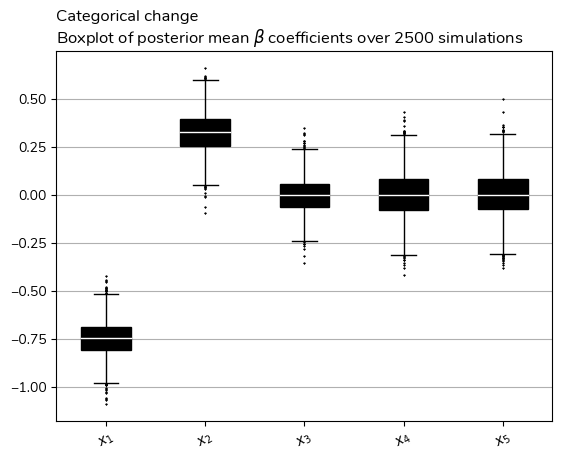

In [15]:
plt.rcParams["font.family"] = "Nunito"

names = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_5$']

fig, ax = plt.subplots()
ax.yaxis.grid(True)
bp = ax.boxplot(x=exp4_df.iloc[:, 1:6].to_numpy(), labels=names, sym='*', patch_artist=True)
plt.setp(bp['fliers'], markersize=1.0)
plt.xticks(rotation=30)
plt.setp(bp["boxes"], facecolor="black")
plt.setp(bp["medians"], color="white")
ax.set_title("Categorical change\nBoxplot of posterior mean "+str(r'$\beta$')+" coefficients over 2500 simulations", loc='left')
plt.savefig("BoxplotMixed.pdf")